# Table of Contents
* [The HiC_data object](#The-HiC_data-object)
* [Filter columns with too few interaction count](#Filter-columns-with-too-few-interaction-count)
* [Normalization](#Normalization)
	* [Other normalizations](#Other-normalizations)
* [Save raw and normalized matrices](#Save-raw-and-normalized-matrices)
	* [Save biases and bin filtering](#Save-biases-and-bin-filtering)
	* [Save normalized chromosome matrices](#Save-normalized-chromosome-matrices)


# The HiC_data object

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [2]:
r_enz_1 = 'HindIII'
r_enz_2 = 'MboI'
reso = 1000000

In [3]:
hic_data_1 = load_hic_data_from_reads(
    'results/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz_1),
    reso)
hic_data_2 = load_hic_data_from_reads(
    'results/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz_2),
    reso)

# Filter columns with too few interaction count

For this, very sparse, example dataset we are going to ask for very few interactions per bin.

This can be done either by setting `min_perc` asking for each bin to contain a minimum percentage of cells with interaction data. Or but setting `min_count` asking that the number of cells with interaction data of each bin is above the defined cutoff.


   124   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   742   931
   932  1295  1563  1567  1571  1572  1586  1587  1588  1589  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599
  1600  1601  1721  1867  1868  2085  2086  2087  2088  2089  2090  2091  2092  2093  2094  2095  2096  2097  2098  2099
  2100  2101  2102  2200  2201  2202  2203  2204  2205  2206  2207  2208  2209  2210  2211  2212  2213  2214  2215  2216
  2217  2307  2308  2309  2310  2311  2312  2313  2314  2315  2316  2317  2318  2319  2320  2321  2322  2323  2324  2447
  2448  2449  2450  2451  2452  2453  2454  2455  2601  2602  2603  2604  2691  2692  2752  2790  2791  2792  2793  2794
  2801  2837  2838  2839  2840  2841  2842  2843  2844  2845  2846  2850  2851  2888  2889  2947  2948  2949  3044  3045
  3046  3047  3052  3053  3054  3059  3060  3061  3062  3063  3067  3068  3069  3070  3072  3073  3074  3075  3076  3077
  3078  3079  3080  3081  3082 

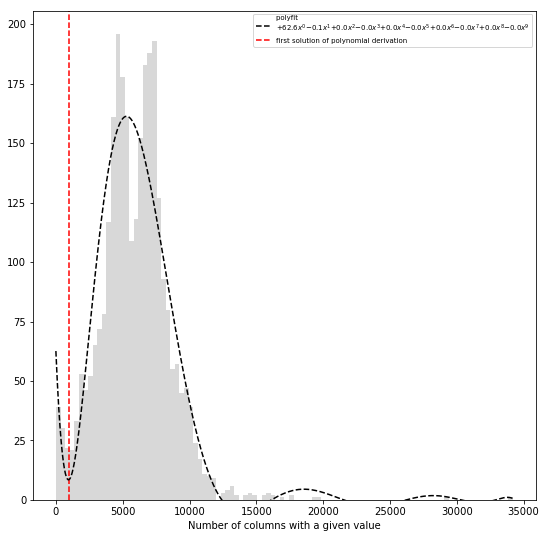


     1   121   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140
   141   142   143   144   145   147   149   337   340   341   342   492   584   585   691   742   882   930   931   932
   953  1064  1124  1294  1295  1296  1403  1440  1441  1541  1563  1564  1565  1566  1567  1571  1572  1581  1582  1583
  1585  1586  1587  1588  1589  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599  1600  1601  1602  1603  1604
  1605  1606  1607  1608  1609  1680  1721  1866  1867  1868  1950  1986  1987  2085  2086  2087  2088  2089  2090  2091
  2092  2093  2094  2095  2096  2097  2098  2099  2100  2101  2102  2199  2200  2201  2202  2203  2204  2205  2206  2207
  2208  2209  2210  2211  2212  2213  2214  2215  2216  2217  2218  2307  2308  2309  2310  2311  2312  2313  2314  2315
  2316  2317  2318  2319  2320  2321  2322  2323  2324  2325  2326  2327  2329  2446  2447  2448  2449  2450  2451  2452
  2453  2454  2455  2500  2524 

Found 269 of 3102 columns with poor signal


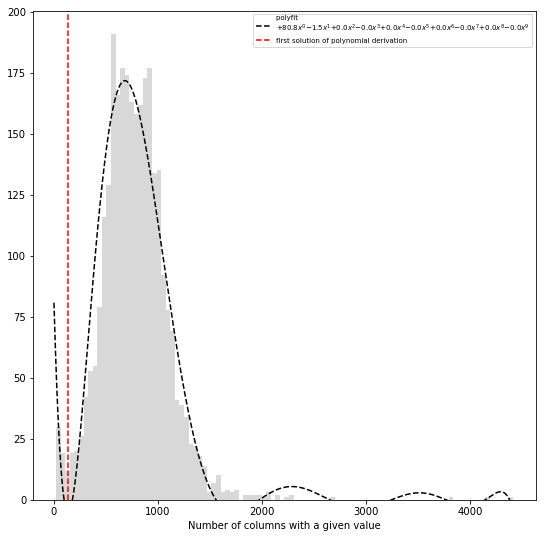

Found 266 of 3102 columns with poor signal



     1   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141
   142   143   145   340   341   342   343   492   584   585   691   742   882   930   931   932   953  1124  1294  1295
  1296  1297  1403  1440  1441  1541  1563  1564  1565  1566  1567  1571  1572  1581  1582  1585  1586  1587  1588  1589
  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599  1600  1601  1602  1603  1604  1605  1606  1607  1608  1609
  1680  1721  1722  1866  1867  1868  1950  1986  1987  2085  2086  2087  2088  2089  2090  2091  2092  2093  2094  2095
  2096  2097  2098  2099  2100  2101  2102  2199  2200  2201  2202  2203  2204  2205  2206  2207  2208  2209  2210  2211
  2212  2213  2214  2215  2216  2217  2218  2307  2308  2309  2310  2311  2312  2313  2314  2315  2316  2317  2318  2319
  2320  2321  2322  2323  2324  2325  2326  2327  2329  2444  2446  2447  2448  2449  2450  2451  2452  2453  2454  2455
  2500  2524  2525  2526  2584 

In [4]:
hic_data_1.filter_columns(draw_hist=True, min_count=10, by_mean=True)
hic_data_2.filter_columns(draw_hist=True, min_count=10, by_mean=True)

In [5]:
print len(hic_data_1)
print len(hic_data_1.bads)
print len(hic_data_2)
print len(hic_data_2.bads)

3102
269
3102
266


# Normalization

As normalization we use either the ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) with a "full" normalization until the sum of all columns of the matrix are equal, or something more similar to the _vanilla_ normalization used in <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) which is exactly like running the ICE normalization without iterations.

_Note: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction_

In [6]:
hic_data_1.normalize_hic(iterations=10, max_dev=0.1)
hic_data_2.normalize_hic(iterations=10, max_dev=0.1)

iterative correction
  - copying matrix
  - computing baises
           925.000        6068.627       36651.000    0   5.03942
          2590.992        6890.690       22954.353    1   2.33121
          2565.382        7406.752       11323.117    2   0.65364
          5564.614        7714.378       17646.667    3   1.28750
          3907.979        7920.873        9984.402    4   0.50662
          6575.573        8053.562       14122.857    5   0.75362
          5078.471        8144.699        9498.490    6   0.37647
          7182.960        8205.508       11988.885    7   0.46108
          6012.410        8247.864        9191.391    8   0.27103
          7526.569        8276.798       10683.760    9   0.29081
          6714.214        8297.160        8971.088   10   0.19078
rescaling to factor 1
  - getting the sum of the matrix
    => 2837.829
  - rescaling biases
iterative correction
  - copying matrix
  - computing baises
           138.000         790.629        4403.000    0   4

At 100 kb itmakes no sense to view the full matrix (your matrix will have more cells than your screen have pixels).

Try plotting a region of the genome only, with the `focus` parameter.

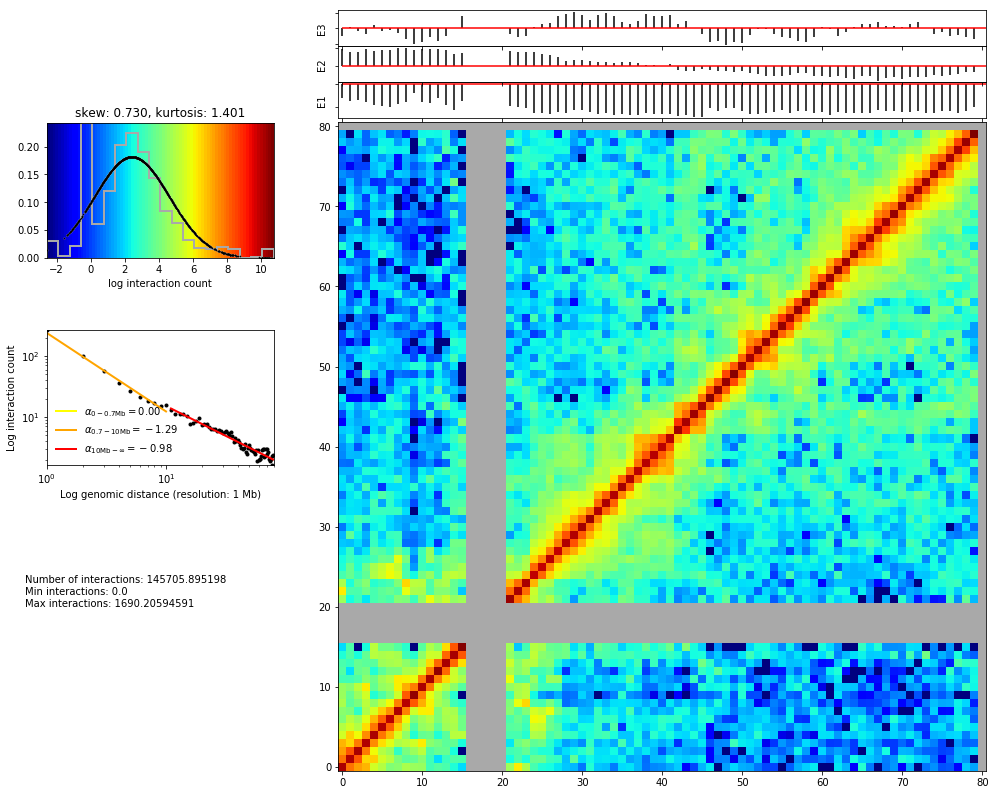

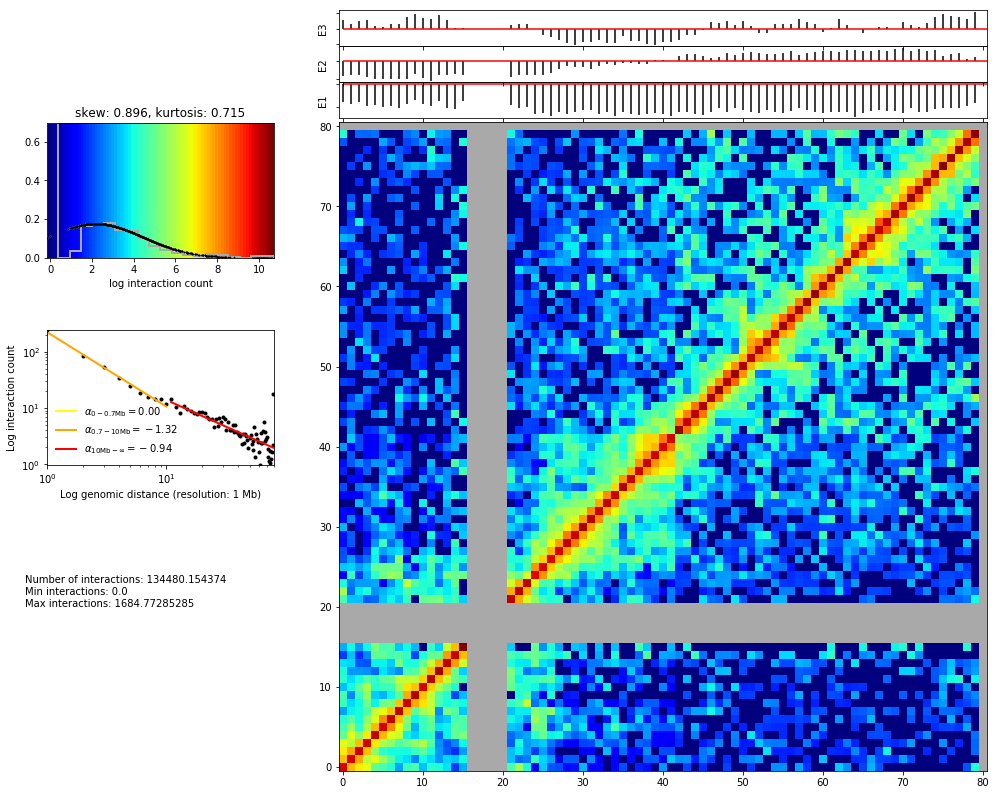

In [7]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data_1, normalized=True, focus='chr18', show=True)
hic_map(hic_data_2, normalized=True, focus='chr18', show=True)

## Other normalizations

ICE normalization is widely used however other, more convaluted, normalizations <a name="ref-1"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-2"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then added as normalized matrices.

# Save raw and normalized matrices

## Save biases and bin filtering

In [8]:
from cPickle import dump

In [9]:
! mkdir -p results/$r_enz_1/04_normalizing
! mkdir -p results/$r_enz_2/04_normalizing

Save biases to separate file.

In [10]:
out = open('results/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz_1), 'w')
dump(hic_data_1.bias, out)
out.close()
out = open('results/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz_2), 'w')
dump(hic_data_2.bias, out)
out.close()

Save "bad" columns to an other file

In [11]:
out = open('results/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz_1), 'w')
dump(hic_data_1.bads, out)
out.close()
out = open('results/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz_2), 'w')
dump(hic_data_2.bads, out)
out.close()

## Dryhic normalization

We can launch the external script to use dryhic normalization

In [29]:
! time ./dryhic3.r results/HindIII/03_filtering/valid_reads12_HindIII.tsv \
       results/HindIII/04_normalizing/bad_columns_1000000_HindIII.pick \
       HindIII hg38 1000000 results/HindIII/04_normalizing/biases_dryhic_1000000_HindIII.pick

Getting contacts
Read 8626149 rows and 2 (of 13) columns from 0.969 GB file in 00:00:06
Getting genomic features
Merging info
Getting bad bins
Computing biases
Storing results
30.46user 1.44system 0:31.95elapsed 99%CPU (0avgtext+0avgdata 1242684maxresident)k
0inputs+448outputs (0major+585149minor)pagefaults 0swaps


In [30]:
! time ./dryhic3.r results/MboI/03_filtering/valid_reads12_MboI.tsv \
       results/MboI/04_normalizing/bad_columns_1000000_MboI.pick \
       MboI hg38 1000000 results/MboI/04_normalizing/biases_dryhic_1000000_MboI.pick

Getting contacts
Getting genomic features
Merging info
Getting bad bins
Computing biases
Storing results
15.33user 0.65system 0:16.00elapsed 99%CPU (0avgtext+0avgdata 510888maxresident)k
0inputs+448outputs (0major+223362minor)pagefaults 0swaps


In [38]:
bias_dry_path = 'results/{1}/04_normalizing/biases_dryhic_{0}_{1}.tsv'

hic_data_1.bias = dict([(int(l.split()[0]), float(l.split()[1])) for l in open(bias_dry_path.format(reso, 'HindIII'))])
hic_data_2.bias = dict([(int(l.split()[0]), float(l.split()[1])) for l in open(bias_dry_path.format(reso, 'MboI'))])

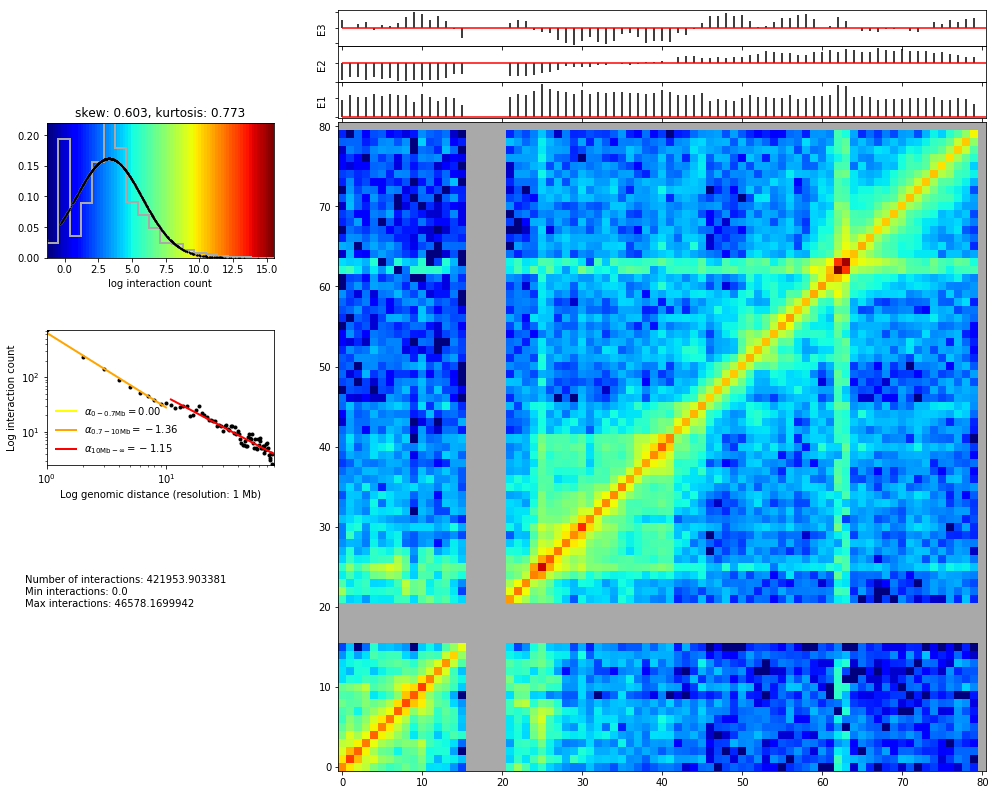

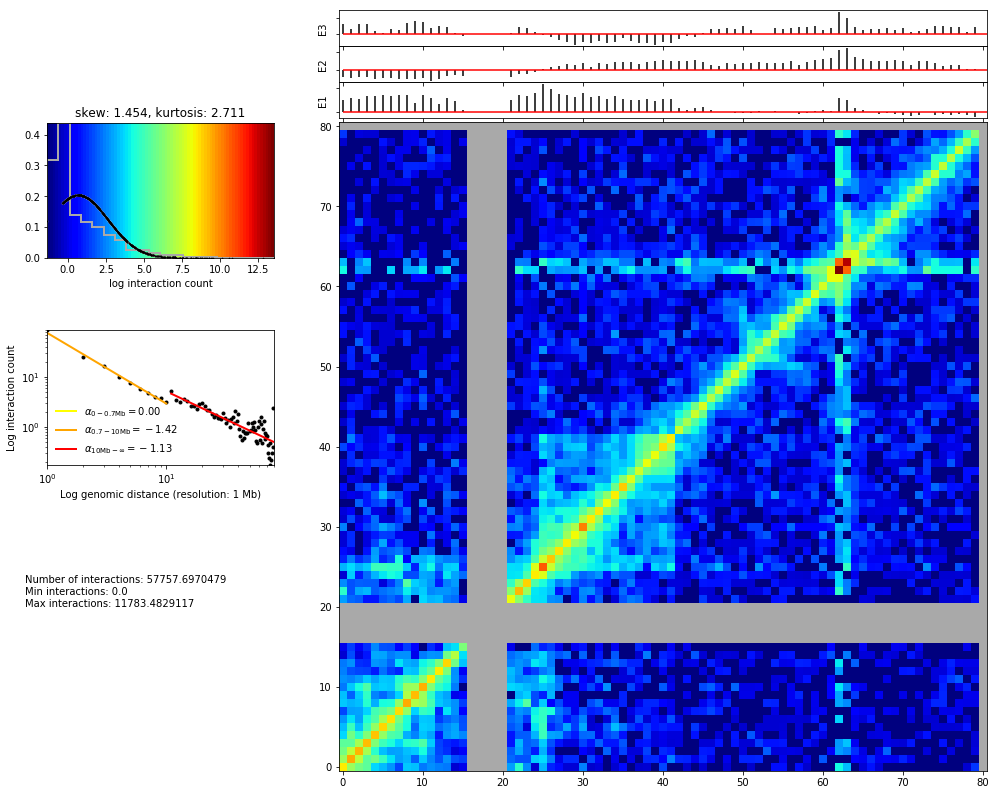

In [39]:
hic_map(hic_data_1, normalized=True, focus='chr18', show=True)
hic_map(hic_data_2, normalized=True, focus='chr18', show=True)

## Save normalized chromosome/genome matrices

This time we do not need to save appart the normalization biases and the list of columns with poor signal.

In [14]:
hic_map(hic_data_1, by_chrom='intra', normalized=False,
       savedata='results/{1}/04_normalizing/{0}_raw'.format(reso, r_enz_1))
hic_map(hic_data_2, by_chrom='intra', normalized=False,
       savedata='results/{1}/04_normalizing/{0}_raw'.format(reso, r_enz_2))

In [15]:
hic_map(hic_data_1, by_chrom='intra', normalized=True,
       savedata='results/{1}/04_normalizing/{0}_norm'.format(reso, r_enz_1))
hic_map(hic_data_2, by_chrom='intra', normalized=True,
       savedata='results/{1}/04_normalizing/{0}_norm'.format(reso, r_enz_2))

If the resolution is not to low, we could also save genomic matrices:

In [18]:
if reso >= 300000:
    hic_map(hic_data_1, by_chrom=False, normalized=False,
            savedata='results/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz_1))

    hic_map(hic_data_1, by_chrom=False, normalized=True,
            savedata='results/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz_1))
    hic_map(hic_data_2, by_chrom=False, normalized=False,
            savedata='results/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz_2))

    hic_map(hic_data_2, by_chrom=False, normalized=True,
            savedata='results/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz_2))    

<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

# References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-3) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-4) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

